In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
#filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2500000/6BF93845-49D5-2547-B860-4F7601074715.root"
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/130000/44187D37-0301-3942-A6F7-C723E9F4813D.root"
#events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=10000).events()

In [3]:
muon = events.Muon
jets = events.Jet

In [4]:
muon

<MuonArray [[Muon, Muon, Muon, ... Muon, Muon]] type='10000 * var * muon'>

In [5]:
good_jets_mask = ak.ones_like(jets.pt, dtype=bool)

In [6]:
good_jets_mask = good_jets_mask & (jets.pt > 20) & (np.abs(jets.eta) < 4.5) & (jets.jetId >=2)

In [8]:
good_jets_mask

<Array [[True, True, True, ... False, False]] type='10000 * var * bool'>

(array([  41.,  303., 3496., 2392., 1755., 1572.,  269.,  156.,   12.,
           4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

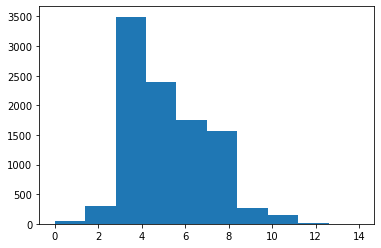

In [9]:
plt.hist(ak.num(jets[good_jets_mask]))

In [10]:
jets.metric_table(muon)

<Array [[[3.46, 2.41, 2.99, ... 3.84, 5.02]]] type='10000 * var * var * float32'>

In [11]:
dR_jets_muon = jets.metric_table(muon)

In [12]:
dR_jets_muon[0:3].tolist()

[[[3.4608163833618164, 2.4145047664642334, 2.9903438091278076],
  [3.546807050704956, 1.2872371673583984, 1.904130458831787],
  [3.7011148929595947, 0.004979511257261038, 2.667754650115967],
  [5.3689188957214355, 2.722442865371704, 0.06658194214105606],
  [6.6255412101745605, 3.937771797180176, 1.3439323902130127]],
 [[3.2887911796569824, 4.001104831695557],
  [1.9008373022079468, 2.6798179149627686],
  [0.05326253920793533, 1.213828444480896],
  [1.506186604499817, 2.006315231323242],
  [3.2177135944366455, 4.4769606590271],
  [4.640990257263184, 5.8903303146362305],
  [2.050309419631958, 0.93873530626297]],
 [[], [], [], [], [], []]]

In [13]:
print("N muons:", ak.num(muon)[0:3].tolist())
print("N jets:", ak.num(jets)[0:3].tolist())

N muons: [3, 2, 0]
N jets: [5, 7, 6]


In [14]:
dR_jets_muon < 0.4

<Array [[[False, False, ... False, False]]] type='10000 * var * var * bool'>

In [15]:
ak.prod(dR_jets_muon>0.4, axis=2)[0:3].tolist()

[[1, 1, 0, 0, 1], [1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

Doing an or of the mask to check if the jet has at least a lepton close enough

In [16]:
jets_lep_mask = ak.prod(dR_jets_muon>0.4, axis=2) == 1

In [17]:
good_jets_mask & jets_lep_mask 

<Array [[True, True, False, ... False, False]] type='10000 * var * bool'>

In [18]:
cleaned_jets = jets[good_jets_mask & jets_lep_mask ]

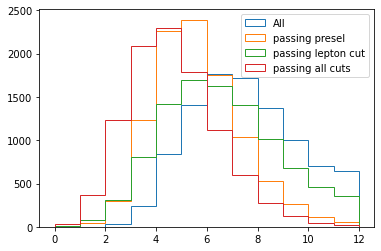

In [22]:
plt.hist(ak.num(jets), histtype="step", bins=(12), range=(0,12),label="All")
plt.hist(ak.num(jets[good_jets_mask]), histtype="step", bins=(12), range=(0,12),label="passing presel")
plt.hist(ak.num(jets[jets_lep_mask]), histtype="step", bins=(12), range=(0,12),label="passing lepton cut")
plt.hist(ak.num(cleaned_jets), histtype="step", bins=(12), range=(0,12),label="passing all cuts")
plt.legend()

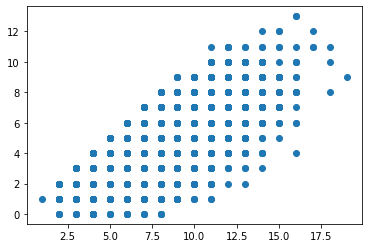

In [21]:
plt.scatter(ak.num(jets), ak.num(cleaned_jets))